Lab09 - XOR. Logistic Regression - Eager Execution
 * XOR문제를 Logistic Regression을 통해 풀어보도록 하겠습니다.

# 기본 Library 선언 및 Tensorflow 버전 확인

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)
tf.__version__

'2.3.1'

# 강의 Data
 * x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data를 0과 1로 구분하는 예제입니다.
 * 붉은색과 푸른색으로 0과 1을 표시해보도록 하겠습니다.

Text(0, 0.5, 'x2')

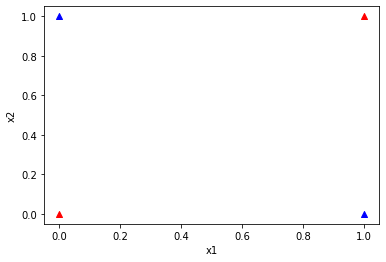

In [3]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1],c='red',marker='^')
plt.scatter(x_data[3][0],x_data[3][1],c='red',marker='^')
plt.scatter(x_data[1][0],x_data[1][1],c='blue',marker='^')
plt.scatter(x_data[2][0],x_data[2][1],c='blue',marker='^')

plt.xlabel('x1')
plt.ylabel('x2')

# Tensorflow Eager
 * Tensorflow Data API를 통해 학습시킬 값들을 담는다. (Batch Size는 한번에 학습시킬 Size로 정한다)
 * Preprocess function으로 Features, labels는 실제 학습에 쓰일 Data 연산을 위해 Type을 맞춰준다.

In [4]:
dataset = tf.data.Dataset.from_tensor_slices((x_data,y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features,tf.float32)
    labels = tf.cast(labels,tf.float32)
    return features, labels

Neural Network를 통해 XOR해결

 * 위의 Data를 3Layer의 Neural Network를 통해 학습시킨 후 모델을 생성합니다.(강의에서 설명한 구조)

In [5]:
W1 = tf.Variable(tf.random.normal((2,1)),name='weight1')
b1 = tf.Variable(tf.random.normal((1,)),name='bias1')

W2 = tf.Variable(tf.random.normal((2,1)),name='weight2')
b2 = tf.Variable(tf.random.normal((1,)),name='bias2')

W3 = tf.Variable(tf.random.normal((2,1)),name='weight3')
b3 = tf.Variable(tf.random.normal((1,)),name='bias3')

Two Layer Neural Net

In [6]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features,W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features,W2) + b2)
    layer3 = tf.concat([layer1,layer2],-1)
    layer3 = tf.reshape(layer3,shape=[-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3,W3) + b3)
    return hypothesis 

def loss_fn(hypothesis,labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1-labels) * tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis,labels):
    predicted = tf.cast(hypothesis > 0.5,dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,labels),dtype=tf.float32))
    
def grad(hypothesis,features,labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value,[W1,W2,W3,b1,b2,b3])

In [7]:
epochs = 50000

for step in range(epochs):
    for features, labels in dataset:
        features, labels = preprocess_data(features,labels)
        grads = grad(neural_net(features),features,labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1,W2,W3,b1,b2,b3]))
        if step % 5000 == 0:
            print('iter: {},loss: {:.4f}'.format(step,loss_fn(neural_net(features),labels)))

x_data, y_data = preprocess_data(x_data,y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print('Testset Accuracy: {:.4f}'.format(test_acc))

iter: 0,loss: 0.8487
iter: 5000,loss: 0.6847
iter: 10000,loss: 0.6610
iter: 15000,loss: 0.6154
iter: 20000,loss: 0.5722
iter: 25000,loss: 0.5433
iter: 30000,loss: 0.5211
iter: 35000,loss: 0.4911
iter: 40000,loss: 0.4416
iter: 45000,loss: 0.3313


TypeError: unsupported format string passed to NoneType.__format__